n = 1.339 ± 0.018


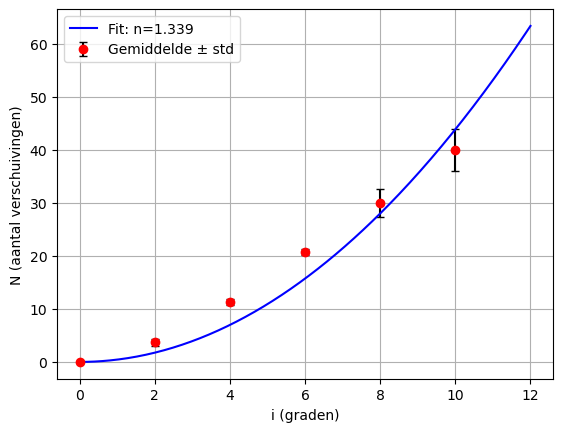

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def N_model(i, n):
    lam, d = 532e-9, 3e-3
    return (2 * d / lam) * (1 - np.cos(i) - n + np.sqrt(n**2 - np.sin(i)**2))

i_deg = np.array([0, 2, 4, 6, 8, 10])
N_data = np.array([
    [0, 0, 0],
    [3, 4, 4],
    [12, 11, 11],
    [20, 21, 21],
    [27, 32, 31 ],
    [36, 40, 44]
])

N_mean = N_data.mean(axis=1)
N_std  = N_data.std(axis=1, ddof=1)

i_rad_all = np.repeat(np.deg2rad(i_deg), N_data.shape[1])
N_all = N_data.flatten()

popt, pcov = curve_fit(N_model, i_rad_all, N_all, p0=[1.5])
perr = np.sqrt(np.diag(pcov))
print(f"n = {popt[0]:.3f} ± {perr[0]:.3f}")

i_fit = np.linspace(0, np.deg2rad(12), 300)

plt.errorbar(i_deg, N_mean, yerr=N_std, fmt='o', color='r', ecolor='k', capsize=3, 
             label="Gemiddelde ± std")
plt.plot(np.rad2deg(i_fit), N_model(i_fit, *popt), 'b-', 
         label=f"Fit: n={popt[0]:.3f}")

plt.xlabel("i (graden)")
plt.ylabel("N (aantal verschuivingen)")
plt.legend()
plt.grid()
plt.show()
